# Coursework1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Paperspace, where you can access GPUs. 

#### Paperspace
See [the Paperspace information doc](https://hackmd.io/@afspies/S1stL8Qnt). 

The public tests are embedded within the notebook and you can ignore the **tests** folder

#### Google Colab
To run this notebook on Google Colab, please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

**To run the public tests within colab** you will need to copy the "tests" folder to the ```/content/``` directory (this is the default working directory - you can also change directories with ```%cd```)

#### Setup
You will need to install pytorch and other libraries by running the following cell:

In [4]:
!pip install -q otter-grader pandoc torch torchvision sklearn seaborn

In [5]:
!pwd

/Users/mariakosyuchenko/programming/deep_learning/DL_CW_1_mk21


In [6]:
# Initialization Cell
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
import numpy as np
rng_seed = 90

## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic pytorch operations to define the 2D convolution, 2D max pooling, linear layer as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not what to see any _for loops_!

**Your Task**
- implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height HH and width WW.

        Parameters:
        - w: Filter weights of shape (F, C, HH, WW)
        - b: Biases, of shape (F,)
        - kernel_size: Size of the convolving kernel
        - stride: The number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: The number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        ...
        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y]
        if isinstance(kernel_size, tuple):
            shape = (out_channels, in_channels, kernel_size[0], kernel_size[1])
        else:
            shape = (out_channels, in_channels, kernel_size, kernel_size)

        self.w = torch.randn(size=shape) 
        # Bias should have shape [out_channels] 
        self.b = torch.zeros(out_channels) 
        self.F = out_channels
        self.C = in_channels
        if isinstance(kernel_size, tuple):
            self.kernel_size = kernel_size
        else:
            self.kernel_size = (kernel_size, kernel_size)
        
        if isinstance(stride, tuple):
            self.stride = stride
        else:
            self.stride = (stride, stride)

        if isinstance(padding, tuple):
            self.padding = padding
        else:
            self.padding = (padding, padding)

        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass                                     #

        blocks = F.unfold(x,kernel_size=(self.kernel_size[0],self.kernel_size[1]), stride=(self.stride[0],self.stride[1]), padding=(self.padding[0],self.padding[1]))
        blocks_transposed = blocks.transpose(1, 2) # dim = (batch_size, number_sliding_blocks, color*kernel_size*kernel_size)
        weight_reshape_2D = self.w.view(self.w.size(0), -1).t() # dim = (color*kernel_zise*kernel*size, filter_maps)
        
        
        convol = blocks_transposed @ weight_reshape_2D + self.b# dim = (batch_size, number_sliding_blocks, filter_maps)
        convol_transpose = convol.transpose(1, 2) # dim = (batch_size, filter_maps, number_sliding_blocks)

        convol_height = (x.shape[2] + 2*self.padding[0] - self.kernel_size[0])//self.stride[0] + 1
        convol_width = (x.shape[3] + 2*self.padding[1] - self.kernel_size[1])//self.stride[1] + 1
        # print(convol_height, convol_width)
        out = convol_transpose.view(x.shape[0], self.w.shape[0], convol_height, convol_width)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [16]:
grader.check("Convolution Layer")

Convolution Layer results: All test cases passed!

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        ...
        if isinstance(kernel_size, tuple):
            self.kernel_size = kernel_size
        else:
            self.kernel_size = (kernel_size, kernel_size)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        blocks = F.unfold(x,kernel_size=(self.kernel_size[0],self.kernel_size[1]), stride=(self.kernel_size[0],self.kernel_size[1]))
        # print(blocks.size())
        N = x.size()[0]
        C = x.size()[1]
        blocks_per_hw = blocks.size()[2]
        # print(N, C, blocks_per_hw)
        blocks_4D = blocks.view(N, C, -1, blocks_per_hw)
        # print(blocks_4D.shape)
        collapsed, _ = torch.max(blocks_4D, dim = 2, keepdim=True)
        # print(collapsed.size())
        # print(int(blocks_per_hw**0.5))
        # print(collapsed.view(N,C,int(blocks_per_hw**0.5), -1))
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        
        convol_height = math.floor((x.shape[2] + 2*0 - self.kernel_size[0])//self.kernel_size[0] + 1)
        convol_width = math.floor((x.shape[3] + 2*0 - self.kernel_size[1])//self.kernel_size[1] + 1)

        return collapsed.view(N,C,convol_height, convol_width)

In [15]:
grader.check("MaxPool Layer")

MaxPool Layer results: All test cases passed!

In [17]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        self.w = torch.randn(in_channels, out_channels)
        self.b = torch.zeros(out_channels)
        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        out = x @ (self.w) + self.b
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [18]:
a = torch.randn((2,3,5))
w = torch.randn((5,7))
b = torch.randn(7)
forw = a@w + b

In [19]:
grader.check("Linear Layer")

Linear Layer results: All test cases passed!

In [21]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: momentum – the value used for the running_mean and running_var
        computation. Default: 0.1
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        input_shape = (1, self.num_features, 1, 1)
        self.gamma =  torch.rand(self.num_features)
        self.beta = torch.zeros(self.num_features)
        self.running_mean = torch.zeros(input_shape)
        self.running_var = torch.zeros(input_shape)

        ...
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        if not torch.is_grad_enabled():
            x_mean = self.running_mean
            x_var = self.running_var

        else:
            x_mean = x.mean(dim=(0,2,3), keepdim = True)
            x_var = ((x - x_mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
            self.running_mean = self.momentum * self.running_mean + (1.0 - self.momentum) * x_mean
            self.running_var = self.momentum * self.running_var + (1.0 - self.momentum) * x_var
        
        mean = (x - x_mean) /  torch.sqrt(x_var + self.eps)
        x = self.gamma.unsqueeze(0).unsqueeze(2).unsqueeze(3) * mean + self.beta.unsqueeze(0).unsqueeze(2).unsqueeze(3)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return x

In [22]:
layer = BatchNorm2d(7)
list(layer.gamma.shape) == [7]
list(layer.beta.shape) == [7]

True

In [23]:
grader.check("BatchNorm Layer")

BatchNorm Layer results: All test cases passed!

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

**Downloading NaturalImageNet**

In [4]:
ON_COLAB = False

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
else: 
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

--2022-01-30 17:50:20--  https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138507970 (132M) [application/octet-stream]
Saving to: ‘NaturalImageNetTest.zip?download=1’

NaturalImageNetTest 100%[===================>] 132.09M  2.01MB/s    in 62s     

2022-01-30 17:51:24 (2.11 MB/s) - ‘NaturalImageNetTest.zip?download=1’ saved [138507970/138507970]

--2022-01-30 17:51:24--  https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1383630100 (1.3G) [application/octet-stream]
Saving to: ‘NaturalImageNetTrain.zip?download=1’

NaturalImageNetTrai 100%[===================>]   1.29G  2.65MB/s    in 4m 59

In [5]:
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)

In [6]:
from torchvision.transforms.transforms import GaussianBlur
# When we import the images we want to first convert them to a tensor. 
# It is also common in deep learning to normalise the the inputs. This 
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images 
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
transform = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.GaussianBlur(kernel_size=3),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomRotation(degrees=20),
            transforms.RandomGrayscale(p=0.1),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )
train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'

train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)

# Create train val split
n = len(train_dataset)
n_val = int(n/10)

train_set, val_set = torch.utils.data.random_split(train_dataset, [n-n_val, n_val])


print(len(train_set), len(val_set), len(test_dataset))


# The number of images to process in one go. If you run out of GPU
# memory reduce this number! 
batch_size = 128

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

17986 1998 2000


In [8]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

**Visualising some example images** 

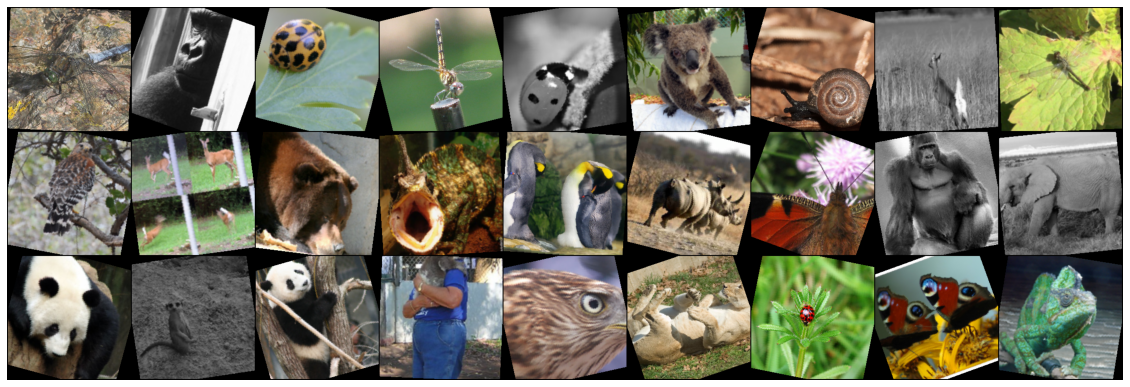

In [9]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

Next, we define ResNet-18:

In [10]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x) 
        
        out = F.relu(out) 
        
        return out


    
# define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 20):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 16
        self.conv1 = nn.Sequential(Conv2d(3, 16, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(16), 
                                  nn.ReLU())
        
        self.layer1 = self.make_layer(ResidualBlock, 16, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 32, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 64, 3, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 128, 4, stride = 2)
        self.layer5 = self.make_layer(ResidualBlock, 256, 6, stride = 2)
        self.layer6 = self.make_layer(ResidualBlock, 512, 3, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        # x = self.maxpool(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
    
# please do not change the name of this class
def MyResNet():
    return ResNet(ResidualBlock)

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  test_img = test_img.cpu()
  samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                      padding=2, normalize=False, value_range=None, 
                      scale_each=False, pad_value=0)
  plt.figure(figsize = (20,10))
  plt.title('Incorrectly Classified Instances')
  show(samples)
  labels = np.asarray(labels)
  print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  print('Corresponding images are shown below')

In [12]:
USE_GPU = True
dtype = torch.float32 


if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
    

print_every = 10
def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)
        return float(acc)

        

def train_part(model, optimizer, epochs=1):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    train_losses = np.zeros(epochs) # *****
    test_losses = np.zeros(epochs)  # *****

    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        train_loss = [] # ******
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()
            train_loss.append(loss.item())

            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
        check_accuracy(loader_val, model)


        # Get train loss and test loss
        train_loss = np.mean(train_loss) # a little misleading
        
        model.eval()
        test_loss = []
        for inputs, targets in loader_val:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          loss = F.cross_entropy(outputs, targets)
          test_loss.append(loss.item())
        test_loss = np.mean(test_loss)
        
        # Save losses
        train_losses[e] = train_loss
        test_losses[e] = test_loss
        
    return train_losses, test_losses # ******    

cuda:0


Total number of parameters is: 21312324
Epoch: 0, Iteration 0, loss = 3.1218
Epoch: 0, Iteration 10, loss = 3.7585
Epoch: 0, Iteration 20, loss = 2.8204
Epoch: 0, Iteration 30, loss = 2.6474
Epoch: 0, Iteration 40, loss = 2.5289
Epoch: 0, Iteration 50, loss = 2.7756
Epoch: 0, Iteration 60, loss = 2.6592
Epoch: 0, Iteration 70, loss = 2.5438
Epoch: 0, Iteration 80, loss = 2.4965
Epoch: 0, Iteration 90, loss = 2.4751
Epoch: 0, Iteration 100, loss = 2.4642
Epoch: 0, Iteration 110, loss = 2.5683
Epoch: 0, Iteration 120, loss = 2.4578
Epoch: 0, Iteration 130, loss = 2.3357
Epoch: 0, Iteration 140, loss = 2.5558
Got 490 / 1998 correct of val set (24.52)
Epoch: 1, Iteration 0, loss = 2.4641
Epoch: 1, Iteration 10, loss = 2.4370
Epoch: 1, Iteration 20, loss = 2.3749
Epoch: 1, Iteration 30, loss = 2.4458
Epoch: 1, Iteration 40, loss = 2.2433
Epoch: 1, Iteration 50, loss = 2.3947
Epoch: 1, Iteration 60, loss = 1.9970
Epoch: 1, Iteration 70, loss = 2.3838
Epoch: 1, Iteration 80, loss = 2.4184
Epo

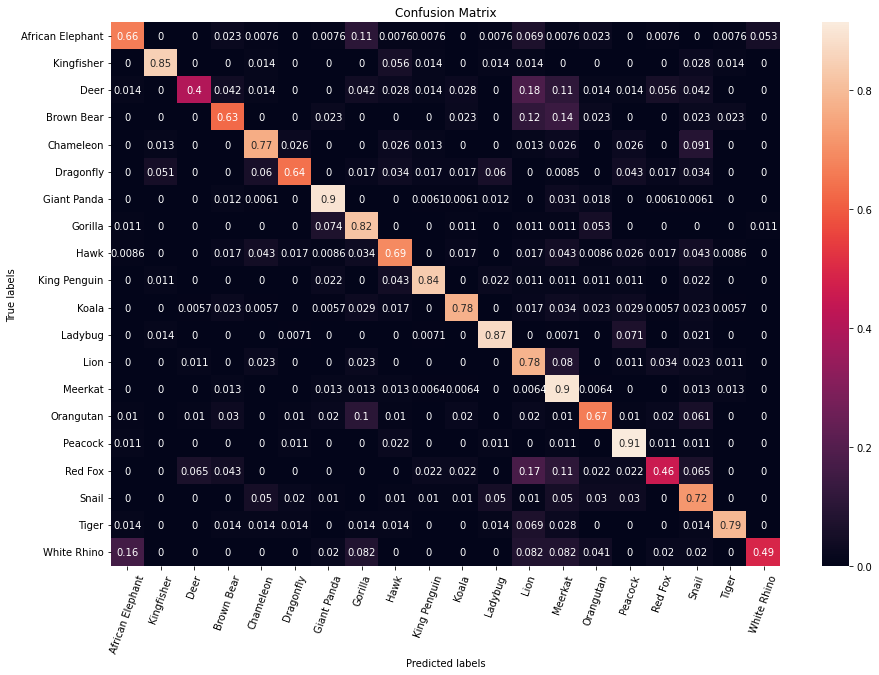

Predicted label ['Peacock' 'Lion' 'Hawk' 'Red Fox' 'Red Fox' 'Chameleon' 'Lion' 'Lion'
 'Meerkat']
True label ['Ladybug' 'Deer' 'King Penguin' 'Orangutan' 'Dragonfly' 'Snail'
 'Brown Bear' 'Hawk' 'Red Fox']
Corresponding images are shown below


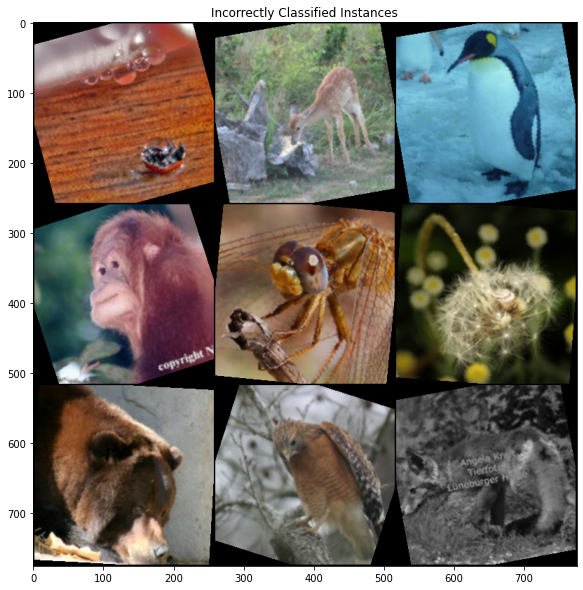

In [13]:
# define and train the network
model = MyResNet()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5) 

params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

train_losses, test_losses = train_part(model, optimizer, epochs = 15)


# report test set accuracy
check_accuracy(loader_val, model, analysis=True)


# save the model
torch.save(model.state_dict(), 'model.pt')

Got 14449 / 17986 correct of val set (80.33)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


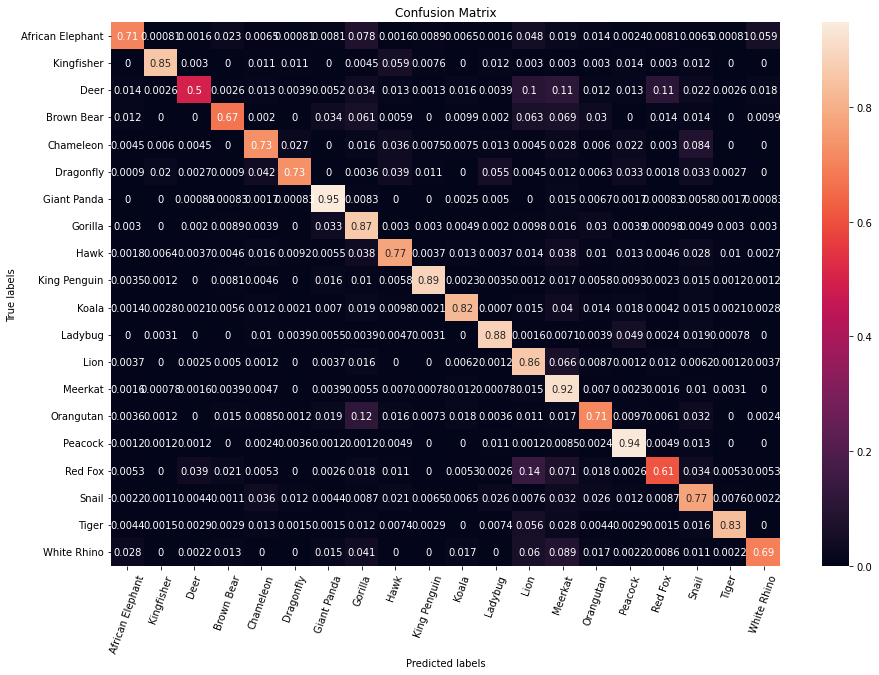

Predicted label ['Peacock' 'Koala' 'Chameleon' 'Gorilla' 'Chameleon' 'Lion' 'Peacock'
 'Gorilla' 'Snail']
True label ['Hawk' 'Orangutan' 'Kingfisher' 'Brown Bear' 'Dragonfly'
 'African Elephant' 'Hawk' 'Orangutan' 'Meerkat']
Corresponding images are shown below


0.8033470477037696

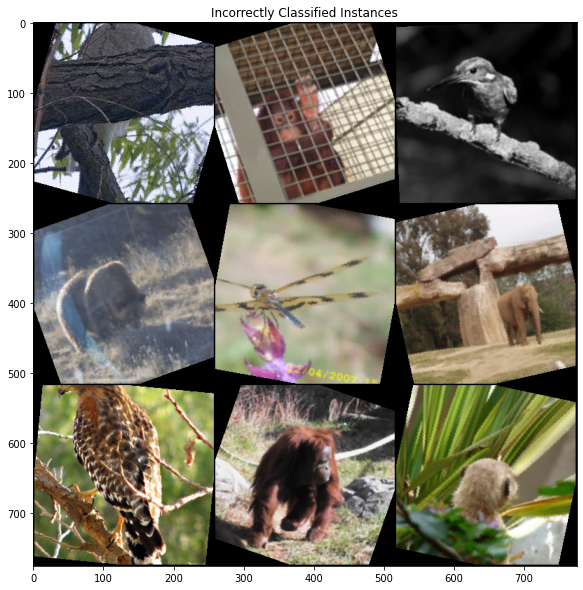

In [14]:
check_accuracy(loader_train, model, analysis=True)

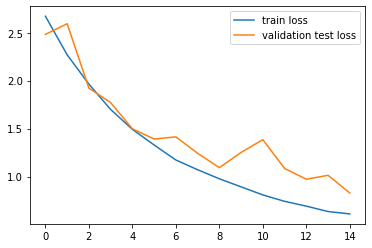

In [15]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='validation test loss')
plt.legend()
plt.show()

---

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1480 / 2000 correct of val set (74.00)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


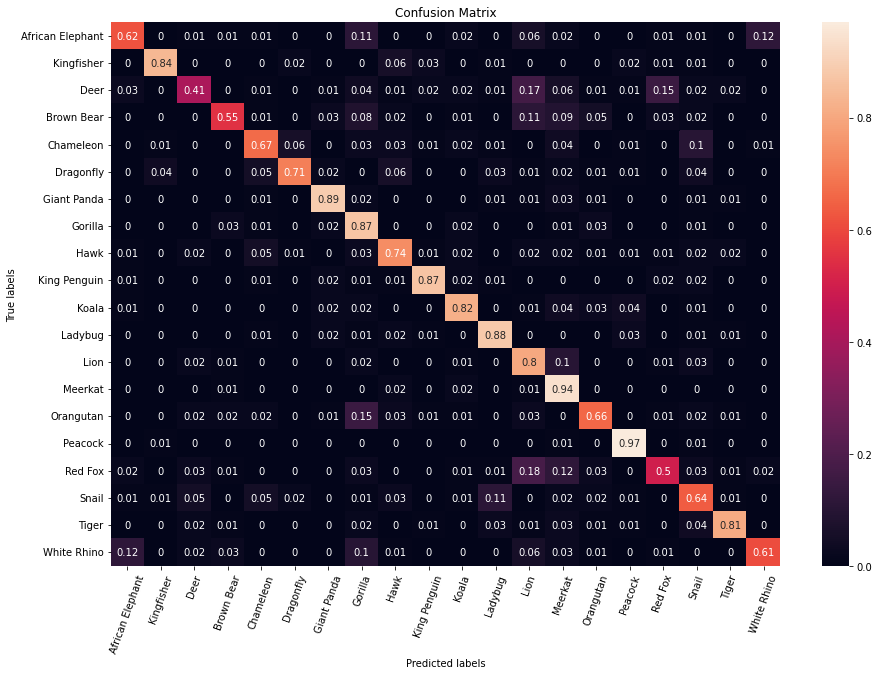

Predicted label ['Snail' 'Lion' 'Orangutan' 'Lion' 'Gorilla' 'Brown Bear' 'White Rhino'
 'Lion' 'Snail']
True label ['Giant Panda' 'Giant Panda' 'Red Fox' 'Deer' 'White Rhino' 'White Rhino'
 'African Elephant' 'Red Fox' 'Hawk']
Corresponding images are shown below


0.74

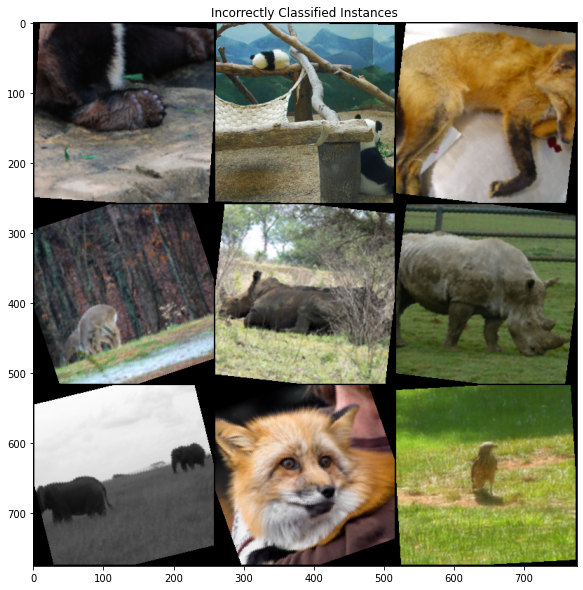

In [16]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)

___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

I believe that the first step for hyper parameters tuning is to identify hyperparameters. Depending on the quantity of trainable parameters one can can perform a grid search by selecting a small and finite set of values to explore for each parameter, and then setting the program to run through the combinations of the hyperparameters specified on the grid, train the model and evaluate it on the validation set. Another approach (computationally lighter) is a random search, where the input is the probability distribution over join hyperparameter configurations and the search algorythm randomly samples joint hyperparameter configurations. 

Given that the target performance improvement in the task is in the range of 10-20% and there are gpu constraints, a less computation-intensive approach may be more optimal. In particular, assuming that the hyperparameters are independent of each other means one only measures the model accuracy to a single parameter / and sequntially tune the model. In this case one assumes that the sensitivity of the model to 2 parameters changed together is the same as the sum of their individual sensitivities.

When not just running all possible hyperparameters combinations in the tuning algorythm, I believe that one could try to rank parameters in according to their marginal impact on the model. In this way, one starts tuning parameters which are expected to have the largest impact on the model accuracy. Of course, it is hard to know in advance which parameter has the large weight on the model performance, so another strategy is to consult papers where similar models were already implemented and use the authors parameters as a starting choice. 

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**

Chnages implemented:
- Adam optimiser / learning rate = 0.001 and weight decay = 1e-5
- Increased number of Residual blocks in layers 3,4,5 and 6 aligning with Resnet34
- Average global pooling instead of Max pooling after layer 6
- Data augmentation: 
    a gaussian blur with a kernel size of 3
    Grayscale augmentation with a probability of grayscale conversion of 10%
    random horizonal flip with 50% probability and random image rotation by +/- 20 degrees
- The number of epochs increased to 15.

My strategy was to first identify what is the stance of the unmodified model in terms of accuracy. For that I plotted loss function vs epochs for validation and train set. Both were large/high, which indicates that the model is underfitting the data and as such model capacity needs to be increased. Baseline validation accuracy was 37%.

I then looked at each of the parameters and identified the direction of change of each of them which would help classifier to better fit the data - i.e. decrease learning rate and weight decay, increase the number of convolution layers and potentially introduce fully connected layers after convolution layers, increase number of epochs and introduce more data augmentation.

From my (very limited) previous experience of training models during “Intro to ML” course I empirically observed that the accuracy of the model is highly sensitive to the learning rate, which is why I started hyperparameter tuning with learning rate adjustment, keeping all other parameters unchanged. Decreasing learning rate from the original 10^-4 to 10 ^-3 and changing the optimiser to Adam improved the accuracy of the validation set by c.23%. Tuning the learning rate to more aggressive 10^-1 rate (as in the original paper) produced much less accuracy increase versus the baseline model, indicating that the step size was too large. 

To further increase model capacity I experimented with the number of convolution layers, to take advantage of Resnet 'non-decreasing' performance and implemented Resnet 34 infrastructure by aligning the size of residual blocks for each of the 6 layers to [2,2,3,4,6,3] from [2,2,2,2,2,2].  Increased number of layers led to rather modest 2-3% increase in the validation dataset accuracy. 

I have experimented with the type of last pooling operation and found out that switching to Average pooling as in the original paper is learning-positive. Potential rationale maybe that the image data is very diverse, i.e. we have many objects on the picture besides the animal. Thus if applying max pool we can have a higher chance of "missing"/misclassifying the actual animal on the picture and mis-classify it for the object in the background. Average pooling "blurs" picture but preserves all elements. 

Introducing FC layers following convolutions harmed model accuracy, even more so when introducing drop-outs, potentially because introducing more weights led to overfitting. Experimenting with switching Relu activation and batch normalisation (aligning with VGG) have improved the speed of learning with about 10% increase in the validation test accuracy by epoch 5, however by epoch 10 both reached a very comparable 68-70% accuracy on the validation set. 

I have noticed that following changes the model training accuracy went as high as 86% yet validation test was not improving past 68% - 70% (depending on the number of epochs). Increasing number of epochs to 20 led to overfitting as training error went close to 0 (98% accuracy) but validation test accuracy plateaued. To limit overfitting I increased regularsation by increasing weight decay to 1e-5, however still the model was running in the overfitting past 10 epochs.

I believe this is a result of a complex, rich structure dataset with animal images not being the only object of the picture. Accordingly, I have experimented with data augmentation, adding a gaussian blur with a kernel size of 3, Grayscale augmentation with a probability of grayscale conversion of 10%, random horizonal flip with 50% probability and random image rotation by +/- 20 degrees. Above data augmentation metrics boosted model performance on the validation set to 74% with number of epochs set to 15. After 15 epochs validation error plateaued while train error continued to fall exponentially – a sign of overfitting.

To conclude enginnering choices which increased the performance the most were: higher learning rate, a switch to Adam optimiser and data augmentation.

---

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

The earlier feature maps detect low level features: colours and edges. It is actually hard to interpret what the 1st convolution layer detects as the image dimension 256x256 is significantly higher than the kernel size of 3x3.
As image dimensions decrease filter occupies higher and higher of the image space relative to the preceding filter and thus "looks" for patterns that occupy higher percentage of the image. In particular, we can see that the feature maps in the final layers capture a lot of details of the image and have many textures of the animal. 

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

Following all the modifications explained in part 2 accuracy test set accuracy achieved was 74%, which is an improvement of c. 37% versus the baseline. Train data accuracy was 80%, and validation set accuracy was 75%. As can be seen on a graph above in the code, both training loss and validation lossed decrease at roughly similar speed, a sign that the model is not overfit. Given how complex the dataset is with a lot of diverse background objects and animal pics in the set all having different angular positions / sizes I believe 74% performance is sufficiently good. When looking at the confusion matrix it is obvious that some animal classes are indeed difficult to differentiate even for a human, for example: gorilla vs bear, gorilla versus orangutan, white rhino versus an elephant, red fox vs lion. Those are the ones that drag performance down as their feature maps look similar. Increasing depth/ epochs further only led to overfitting where the model ends up fully memorising the training examples but does not do better at generalising. 

Potential solution to improve performance can be to either training data set either organically (more labelled examples) or “synthetically” (more data augmentation), especially for classes with low accuracy.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

Accuracy can be misleading, simply follows the performance of the
majority class. Confusion matrix is one potential evaluation metrics. Precision, recall and F1 are computed for each class separately. We can then calculate macro-averaged precision, recall and F1. Confusing matrix can lead to insights on which classes are severely misclassified, and if it is more a result of low recall or precision. Some customised evaluation metrics can be introduced by assigning non-uniform weights to the classes when calculating accuracy.

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [17]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4', 'layer5', 'layer6']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))
        

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2
        
        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



<Figure size 432x288 with 0 Axes>

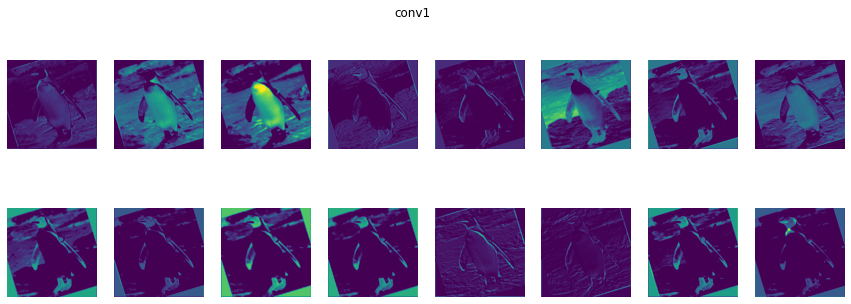

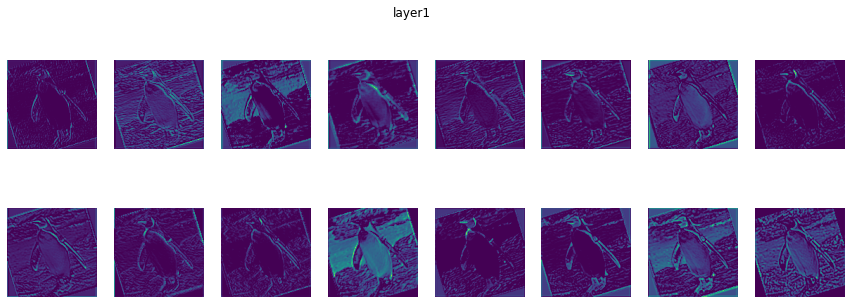

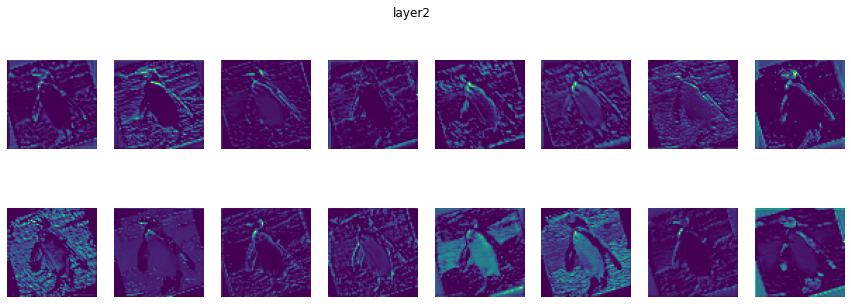

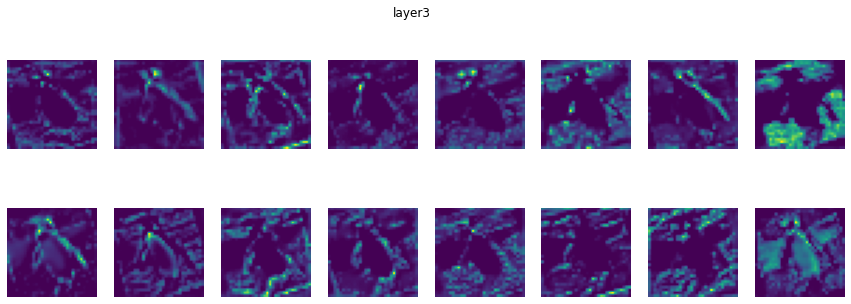

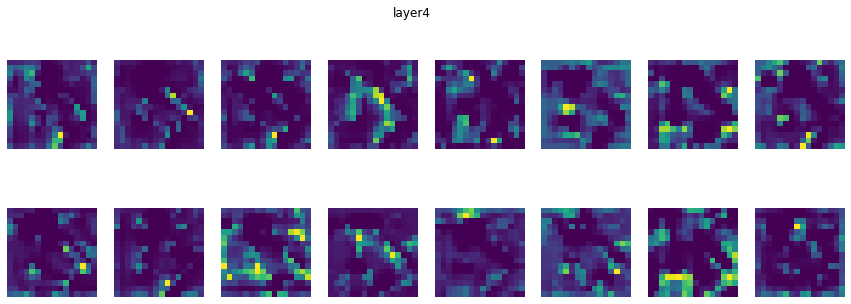

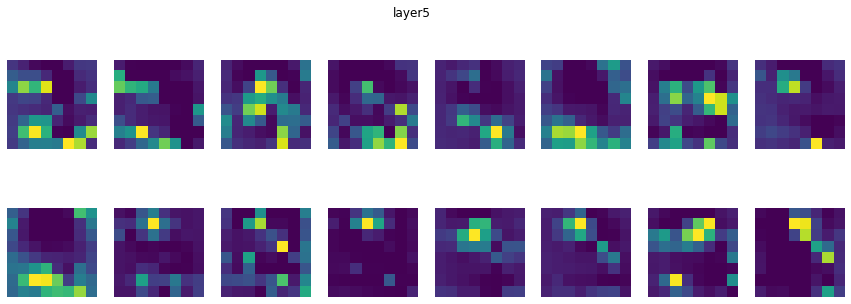

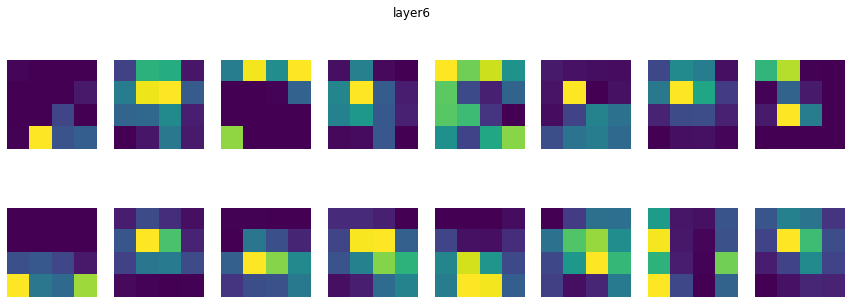

In [18]:
# Visualize the figure here, so it is exported nicely
plot_model_features()  

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

BatchNorm Layer results: All test cases passed!

Convolution Layer results: All test cases passed!

Linear Layer results: All test cases passed!

MaxPool Layer results: All test cases passed!

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)